In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import sklearn.metrics as metrics
from sklearn.metrics import jaccard_similarity_score,accuracy_score,log_loss,f1_score

# We are Going In This Approach
# 1.Collecting Data
# 2.Data Preprocessing
# 3.Train Algorithm
# 4.Test Algorithm
# 5.Deployment
# Since we are not Deploy this Project So skip the last Step'''

# 1.Collect data
# Download The Dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
dataset = pd.read_csv('loan_train.csv')

--2020-06-19 08:14:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-06-19 08:14:41 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
dataset

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


# Remove The unneccesary Column (Unnamed: 0,Unnamed: 0.1)

In [4]:
dataset  = dataset.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [5]:
dataset

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [6]:
dataset.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


# Lets Format the date Column

In [7]:
dataset['due_date'] = pd.to_datetime(dataset['due_date'])
dataset['effective_date'] = pd.to_datetime(dataset['effective_date'])

In [8]:
dataset

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
5,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male
6,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male
7,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male
8,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male
9,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male


In [9]:
dataset['dayofweek'] = dataset['effective_date'].dt.dayofweek

# Here I take the Thresh value as 3 in dayofweek column ,If customer paid before 3 then Weekend is 1 otherwise weekend is 0 (0-Sunday,1-Monday,2-Tuesday,3-Wednesday,4-Thrusday,5-Friday,6-Saturday)

In [10]:
dataset['weekend'] = dataset['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

# Now Remove those Column Which are not taking part of prediction(effective_date,due_date)

In [11]:
dataset  = dataset.drop(['effective_date','due_date','dayofweek'],axis=1)

# 2.DataPreprocessing
# Here We Check 4 Things
# 1.Missing Value treatment
# 2.Outlier Treatment
# 3.Feature Scaling
# 4.Encoding
# So first Step is to Missing Value Treatment ,Lets Check Wheather Missing Value Present Or Not

In [12]:
dataset.isnull().sum()

loan_status    0
Principal      0
terms          0
age            0
education      0
Gender         0
weekend        0
dtype: int64

In [13]:
# There is No Missing value  go to step 2

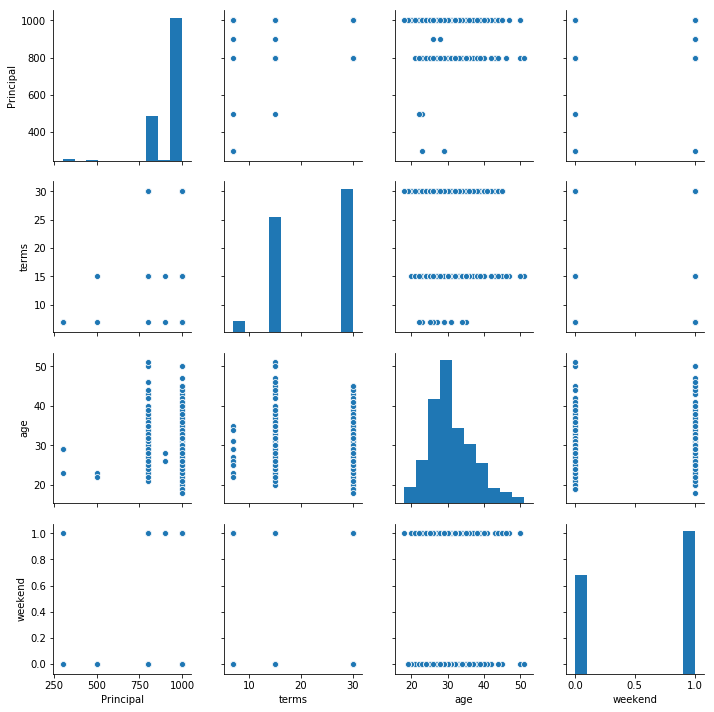

In [14]:
sns.pairplot(dataset)

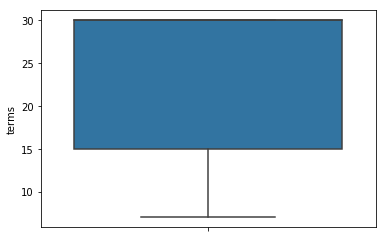

In [15]:
sns.boxplot(y='terms',data=dataset)

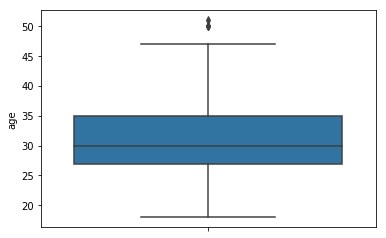

In [16]:
sns.boxplot(y='age',data=dataset)

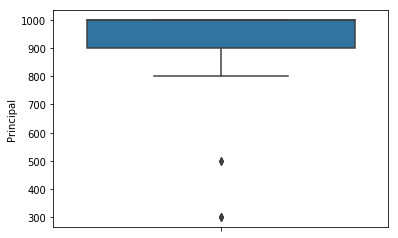

In [17]:
sns.boxplot(y='Principal',data=dataset)

In [18]:
dataset.Principal.value_counts()

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

In [19]:
dataset.age.value_counts()

26    29
29    27
30    27
27    25
28    24
35    20
34    20
31    19
33    17
25    16
24    14
32    14
37    11
38     9
36     9
40     8
39     8
23     8
22     7
21     5
44     4
45     4
42     3
50     3
20     3
43     3
46     2
19     2
41     2
51     1
47     1
18     1
Name: age, dtype: int64

# As you See Outlier is Present but i Dont remove the outlier because outlier number is less and its not high enogh 

# Feature Scaling 

In [20]:
sc = StandardScaler()
dataset[['Principal','terms','age','weekend']]=sc.fit_transform(dataset[['Principal','terms','age','weekend']])
dataset


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,loan_status,Principal,terms,age,education,Gender,weekend
0,PAIDOFF,0.515785,0.920718,2.331526,High School or Below,male,-1.205778
1,PAIDOFF,0.515785,0.920718,0.341701,Bechalor,female,-1.205778
2,PAIDOFF,0.515785,-0.959111,-0.653211,college,male,-1.205778
3,PAIDOFF,0.515785,0.920718,-0.487392,college,female,0.829340
4,PAIDOFF,0.515785,0.920718,-0.321573,college,male,0.829340
5,PAIDOFF,0.515785,0.920718,0.839157,college,male,0.829340
6,PAIDOFF,0.515785,0.920718,-0.487392,college,male,0.829340
7,PAIDOFF,-1.314589,-0.959111,-0.819029,college,male,0.829340
8,PAIDOFF,-5.890524,-1.961686,-0.321573,college,male,0.829340
9,PAIDOFF,0.515785,-0.959111,1.336614,High School or Below,male,0.829340


# In Enconding We Convert Categorical Value To numerical value,I Use LebelEncoder

In [21]:
loan_status=LabelEncoder()
education=LabelEncoder()
Gender=LabelEncoder()

In [22]:
dataset.loan_status=loan_status.fit_transform(dataset.loan_status)
dataset.education=education.fit_transform(dataset.education)
dataset.Gender=Gender.fit_transform(dataset.Gender)

In [23]:
dataset

,loan_status,Principal,terms,age,education,Gender,weekend
0,1,0.515785,0.920718,2.331526,1,1,-1.205778
1,1,0.515785,0.920718,0.341701,0,0,-1.205778
2,1,0.515785,-0.959111,-0.653211,3,1,-1.205778
3,1,0.515785,0.920718,-0.487392,3,0,0.829340
4,1,0.515785,0.920718,-0.321573,3,1,0.829340
5,1,0.515785,0.920718,0.839157,3,1,0.829340
6,1,0.515785,0.920718,-0.487392,3,1,0.829340
7,1,-1.314589,-0.959111,-0.819029,3,1,0.829340
8,1,-5.890524,-1.961686,-0.321573,3,1,0.829340
9,1,0.515785,-0.959111,1.336614,1,1,0.829340


# Data Preprocessing Is Done then We Go for Train Algorithm
# In Train Algorithm We Split dataset into Input and Output Variables and fit data into Algorithm

In [24]:
x = dataset[['Principal','terms','age','education','Gender','weekend']]
y = dataset['loan_status']

# X = Feature Variable
# y = target varibale

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# here  i use 70% of dataset for training and 30% for testing


# Next step is fit Into the Algorithm

# Logistic Regression

In [26]:
model= LogisticRegression()

In [27]:
model.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Then Check Model Prediction

In [28]:
y_pred=model.predict(x_test)

In [29]:
# Then Check The Accuracy

# 1. jaccard index

In [30]:
j_index = jaccard_similarity_score(y_test,y_pred)
print("Accuracy =",round(j_index*100,2)," %")

Accuracy = 78.85  %


# 2. f1_score


In [31]:
accuracy=f1_score(y_test,y_pred)
print("Accuracy =",round(accuracy*100,2)," %")

Accuracy = 87.78  %


# Log Loss

In [32]:
lr_prob =model.predict_proba(x_test)
print("LR LogLoss: %.2f" % log_loss(y_test, lr_prob))

LR LogLoss: 0.46


#  Decision Tree

In [33]:
decisiontree_model = DecisionTreeClassifier()

In [34]:
decisiontree_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
y_predtree=decisiontree_model.predict(x_test)

# 1.jaccard index

In [36]:
j_indextree = jaccard_similarity_score(y_test,y_predtree)
print("Accuracy =",round(j_indextree*100,2)," %")

Accuracy = 72.12  %


# 2.F1_score

In [37]:
fscoretree=f1_score(y_test,y_predtree)
print("Accuracy =",round(fscoretree*100,2)," %")

Accuracy = 81.29  %


#  Support Vector Machine

In [38]:
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(x_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
y_predsvm=svm_model.predict(x_test)

# Jaccard Index

In [40]:
j_indexsvm = jaccard_similarity_score(y_test,y_predsvm)
print("Accuracy =",round(j_indexsvm*100,2)," %")

Accuracy = 75.96  %


# F1 Score

In [41]:
fscoresvm=f1_score(y_test,y_predsvm)
print("Accuracy =",round(fscoresvm*100,2)," %")

Accuracy = 86.34  %


 # k-Nearest Neighbour

In [42]:
score=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(x_train,y_train)
    predKnn=knn.predict(x_test)
    accuracy=metrics.accuracy_score(predKnn,y_test)
    score.append(round(accuracy*100,2))
    print (k,': ',round(accuracy*100,2))
print("maximum Accuracy = {} for K ={}".format(max(score),score.index(max(score))+1))

1 :  65.38
2 :  63.46
3 :  71.15
4 :  71.15
5 :  75.96
6 :  74.04
7 :  77.88
8 :  76.92
9 :  77.88
10 :  78.85
11 :  76.92
12 :  74.04
13 :  74.04
14 :  72.12
15 :  78.85
16 :  73.08
17 :  77.88
18 :  74.04
19 :  77.88
20 :  74.04
21 :  75.96
22 :  74.04
23 :  75.0
24 :  73.08
25 :  74.04
26 :  73.08
27 :  72.12
28 :  72.12
29 :  75.0
30 :  75.0
31 :  75.96
32 :  75.0
33 :  75.96
34 :  76.92
35 :  75.96
36 :  77.88
37 :  76.92
38 :  77.88
39 :  77.88
40 :  77.88
41 :  75.96
42 :  75.96
43 :  75.96
44 :  75.0
45 :  76.92
46 :  76.92
47 :  76.92
48 :  75.96
49 :  76.92
maximum Accuracy = 78.85 for K =10


 # 1. Jaccard index

In [43]:
knn=KNeighborsClassifier(n_neighbors=10,weights='uniform')
knn.fit(x_train,y_train)
y_predKnn=knn.predict(x_test)
j_indexknn = jaccard_similarity_score(y_test,y_predKnn)
print("Accuracy =",round(j_indexknn*100,2)," %")

Accuracy = 78.85  %


# 2. F1 Score

In [44]:
fscoreKnn=f1_score(y_test,y_predKnn)
print("Accuracy =",round(fscoreKnn*100,2)," %")

Accuracy = 86.08  %


In [45]:
print("Logistic Regression")
print("----------------------------")
print("Accuracy in Jaccard Index Score ={}\nAccuracy in F1 Score ={}".format(round(j_index*100,2),round(accuracy*100,2)))
print("LogLoss = %.2f" % log_loss(y_test, lr_prob))
print()
print("Decision Tree")
print("----------------------------")

print("Accuracy in Jaccard Index Score ={}\nAccuracy in F1 Score ={}".format(round(j_indextree*100,2),round(fscoretree*100,2)))
print()
print("Suport vector machine ")
print("----------------------------")
print("Accuracy in Jaccard Index Score ={}\nAccuracy in F1 Score ={}".format(round(j_indexsvm*100,2),round(fscoresvm*100,2)))
print()
print("k-Nearest Neighbour maximum Accuracy at K = {}".format(score.index(max(score))+1))
print("----------------------------")
print("Accuracy in Jaccard Index Score ={}\nAccuracy in F1 Score ={}".format(round(j_indexknn*100,2),round(fscoreKnn*100,2)))

Logistic Regression
----------------------------
Accuracy in Jaccard Index Score =78.85
Accuracy in F1 Score =76.92
LogLoss = 0.46

Decision Tree
----------------------------
Accuracy in Jaccard Index Score =72.12
Accuracy in F1 Score =81.29

Suport vector machine 
----------------------------
Accuracy in Jaccard Index Score =75.96
Accuracy in F1 Score =86.34

k-Nearest Neighbour maximum Accuracy at K = 10
----------------------------
Accuracy in Jaccard Index Score =78.85
Accuracy in F1 Score =86.08


# Lets Test with Loan_test dataset

In [46]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
testdataset = pd.read_csv('loan_test.csv')

--2020-06-19 08:15:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-06-19 08:15:20 (358 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [47]:
testdataset

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male
5,37,37,PAIDOFF,700,15,9/11/2016,9/25/2016,33,High School or Below,male
6,38,38,PAIDOFF,1000,15,9/11/2016,9/25/2016,24,college,male
7,48,48,PAIDOFF,1000,30,9/11/2016,10/10/2016,32,Bechalor,male
8,50,50,PAIDOFF,800,15,9/11/2016,9/25/2016,27,college,female
9,61,61,PAIDOFF,1000,15,9/11/2016,9/25/2016,37,college,male


In [48]:
testdataset['due_date'] = pd.to_datetime(testdataset['due_date'])
testdataset['effective_date'] = pd.to_datetime(testdataset['effective_date'])
testdataset['dayofweek'] = testdataset['effective_date'].dt.dayofweek
testdataset['weekend'] = testdataset['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

testdataset.loan_status=loan_status.fit_transform(testdataset.loan_status)
testdataset.education=education.fit_transform(testdataset.education)
testdataset.Gender=Gender.fit_transform(testdataset.Gender)


In [49]:
testdataset[['Principal','terms','age','weekend']]=sc.fit_transform(testdataset[['Principal','terms','age','weekend']])

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [50]:
x_testnew = testdataset[['Principal','terms','age','education','Gender','weekend']]

In [51]:
y_actual=testdataset['loan_status']

In [52]:
y_actual

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
Name: loan_status, dtype: int64

# Our Model Is Ready ,Now we Only predict with the new dataset

# Logistic Regression

In [53]:
y_prednew=model.predict(x_testnew)
j_indexnew = jaccard_similarity_score(y_actual,y_prednew)
fscoretreenew=f1_score(y_actual,y_prednew)
accuracynew=f1_score(y_test,y_pred)
lr_prob =model.predict_proba(x_testnew)
print("Accuracy By Jaccard Index =",round(j_indexnew*100,2),"%")
print("Accuracy BY F1 Score=",round(accuracynew*100,2),"%")
print("LogLoss = %.2f" % log_loss(y_actual, lr_prob))

Accuracy By Jaccard Index = 75.93 %
Accuracy BY F1 Score= 87.78 %
LogLoss = 0.49


# Decision Tree

In [54]:
y_predtreenew=decisiontree_model.predict(x_testnew)
j_indextreenew = jaccard_similarity_score(y_actual,y_predtreenew)
fscoretreenew=f1_score(y_actual,y_predtreenew)
print("Accuracy  By Jaccard Index=",round(j_indextreenew*100,2)," %")
print("Accuracy By F1 Score =",round(fscoretreenew*100,2)," %")

Accuracy  By Jaccard Index= 75.93  %
Accuracy By F1 Score = 83.12  %


# Support Vector Machine

In [55]:
y_predsvmnew=svm_model.predict(x_testnew)
j_indexsvmnew= jaccard_similarity_score(y_actual,y_predsvmnew)
fscoresvmnew=f1_score(y_actual,y_predsvmnew)
print("Accuracy by Jaccard Index =",round(j_indexsvmnew*100,2)," %")
print("Accuracy By F1 Score =",round(fscoresvmnew*100,2)," %")

Accuracy by Jaccard Index = 68.52  %
Accuracy By F1 Score = 81.32  %


# k-Nearest Neighbour 

In [56]:
y_predKnnnew=knn.predict(x_testnew)
j_indexknnnew = jaccard_similarity_score(y_actual,y_predKnnnew)
fscoreKnnnew=f1_score(y_actual,y_predKnnnew)
print("Accuracy by using F1 score=",round(fscoreKnnnew*100,2)," %")
print("Accuracy by Jaccard Index =",round(j_indexknnnew*100,2)," %")

Accuracy by using F1 score= 76.92  %
Accuracy by Jaccard Index = 66.67  %


# Loan_test Predication Result

In [58]:
print("Logistic Regression")
print("----------------------------")
print("Accuracy in Jaccard Index Score ={}\nAccuracy in F1 Score ={}".format(round(j_indexnew*100,2),round(accuracynew*100,2)))
print("LogLoss = %.2f" % log_loss(y_actual, lr_prob))
print()
print("Decision Tree")
print("----------------------------")

print("Accuracy in Jaccard Index Score ={}\nAccuracy in F1 Score ={}".format(round(j_indextreenew*100,2),round(fscoretreenew*100,2)))
print()
print("Suport vector machine ")
print("----------------------------")
print("Accuracy in Jaccard Index Score ={}\nAccuracy in F1 Score ={}".format(round(j_indexsvmnew*100,2),round(fscoresvmnew*100,2)))
print()
print("k-Nearest Neighbour maximum Accuracy at K = {}".format(10))
print("----------------------------")
print("Accuracy in Jaccard Index Score ={}\nAccuracy in F1 Score ={}".format(round(j_indexknnnew*100,2),round(fscoreKnnnew*100,2)))

Logistic Regression
----------------------------
Accuracy in Jaccard Index Score =75.93
Accuracy in F1 Score =87.78
LogLoss = 0.49

Decision Tree
----------------------------
Accuracy in Jaccard Index Score =75.93
Accuracy in F1 Score =83.12

Suport vector machine 
----------------------------
Accuracy in Jaccard Index Score =68.52
Accuracy in F1 Score =81.32

k-Nearest Neighbour maximum Accuracy at K = 10
----------------------------
Accuracy in Jaccard Index Score =66.67
Accuracy in F1 Score =76.92
